In [162]:
import numpy as np
import matplotlib.pyplot as plt
import  matplotlib.cm as cm
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [163]:
df = pd.read_csv('default_features_1059_tracks.txt', header=None )
df.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85


In [164]:
print("the total number of rows and columns in the data set : \n",df.shape)
print("\n\nMore information about the dataset : \n")
df.info()


the total number of rows and columns in the data set : 
 (1059, 70)


More information about the dataset : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 70 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1059 non-null   float64
 1   1       1059 non-null   float64
 2   2       1059 non-null   float64
 3   3       1059 non-null   float64
 4   4       1059 non-null   float64
 5   5       1059 non-null   float64
 6   6       1059 non-null   float64
 7   7       1059 non-null   float64
 8   8       1059 non-null   float64
 9   9       1059 non-null   float64
 10  10      1059 non-null   float64
 11  11      1059 non-null   float64
 12  12      1059 non-null   float64
 13  13      1059 non-null   float64
 14  14      1059 non-null   float64
 15  15      1059 non-null   float64
 16  16      1059 non-null   float64
 17  17      1059 non-null   float64
 18  18      1059 non-null   float64
 19  19

In [165]:
"""
* Data has only float values.
* No variable column has null/missing values.
"""
# checking if the data contains any NAN (null) values
df.isnull().values.any()
# we get false which means there are no null values

False

In [166]:
data = df.iloc[:,:68] # each row is a song
y = df.iloc[:,68:] # # latitude & longitude

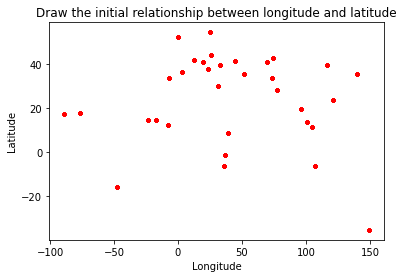

In [167]:
fig = plt.figure()
plt.plot(y.iloc[:, 1], y.iloc[:, 0],".r")
plt.title("Draw the initial relationship between longitude and latitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
fig.savefig("first_fig.png",facecolor="white")

In [168]:
 # The dataset was built from a personal collection of 1059 tracks covering 33 countries/area
NumClusters = 33
kmeans = KMeans(n_clusters=NumClusters , max_iter=600 )
kmeans = kmeans.fit(y)
labels = kmeans.predict(y)
centroids = kmeans.cluster_centers_
centroids

array([[ 4.1900e+01,  1.2480e+01],
       [ 1.3750e+01,  1.0048e+02],
       [-1.5750e+01, -4.7950e+01],
       [ 3.3660e+01,  7.3160e+01],
       [ 1.4660e+01, -1.7410e+01],
       [-6.1700e+00,  3.5740e+01],
       [ 3.9910e+01,  3.2830e+01],
       [ 1.7980e+01, -7.6800e+01],
       [-3.5300e+01,  1.4912e+02],
       [ 3.9910e+01,  1.1638e+02],
       [-6.1700e+00,  1.0682e+02],
       [ 5.2500e+01, -1.2000e-01],
       [ 3.5700e+01,  1.3971e+02],
       [ 3.6700e+01,  3.2100e+00],
       [ 5.4680e+01,  2.5310e+01],
       [ 4.1710e+01,  4.4780e+01],
       [ 9.0300e+00,  3.8740e+01],
       [ 2.3760e+01,  1.2100e+02],
       [ 1.2650e+01, -8.0000e+00],
       [ 4.1330e+01,  1.9800e+01],
       [ 4.1260e+01,  6.9210e+01],
       [ 3.0030e+01,  3.1210e+01],
       [ 3.4030e+01, -6.8500e+00],
       [ 3.5680e+01,  5.1410e+01],
       [ 2.8610e+01,  7.7200e+01],
       [ 1.7250e+01, -8.8760e+01],
       [ 1.9750e+01,  9.6100e+01],
       [ 3.8000e+01,  2.3710e+01],
       [ 1.4910e+01,

<Figure size 432x288 with 0 Axes>

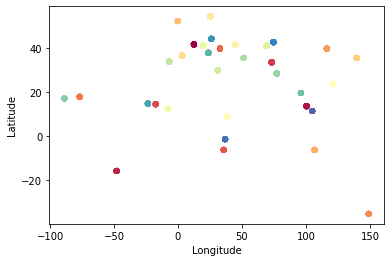

<Figure size 432x288 with 0 Axes>

In [169]:
cmap = cm.get_cmap("Spectral")
colors = [cmap(float(l) /NumClusters) for l in labels]
plt.scatter(y.iloc[:, 1], y.iloc[:, 0], c = colors, s=25)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.figure()

In [170]:
y = labels
X_train, X_test, y_train, y_test = train_test_split(data, y,test_size = 0.30)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (741, 68)
Testing set shape: (318, 68)


In [171]:
from sklearn.preprocessing import StandardScaler

scaler_data = pd.DataFrame(StandardScaler().fit_transform(data),
columns=df.columns[0:68])

scaled_Xtrain = StandardScaler().fit_transform(X_train)
scaled_Xtest =  StandardScaler().fit_transform(X_test)

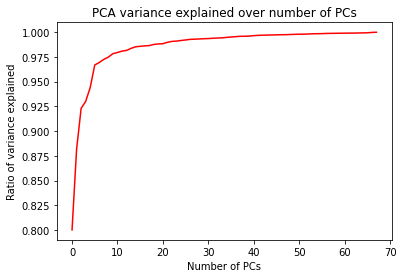

In [172]:
from sklearn.decomposition import PCA
pca = PCA(n_components=68) #
principalComponents = pca.fit_transform(scaler_data)
a= [1- i for i in pca.explained_variance_ratio_]
#????

X_scaler = StandardScaler().fit(data)
PCA_var = PCA(n_components = X_scaler.transform(data).shape[1])
PCA_var.fit(X_scaler.transform(data))
PCA_var_exp = [1 - x/sum(PCA_var.explained_variance_) for x in PCA_var.explained_variance_]

plt.figure()
plt.title("PCA variance explained over number of PCs")
plt.xlabel("Number of PCs")
plt.ylabel("Ratio of variance explained")
plt.plot(range(0, len(a), 1), a, c = 'r')
plt.show()


In [173]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# RandomForest Classifier
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(f"Random Forest accuracy:{metrics.accuracy_score(y_test,rf_pred)}")
#print(confusion_matrix(y_test, rf_pred))

Random Forest accuracy:0.44339622641509435


In [174]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 10))
sel.fit(X_train, y_train)
# To see which features are important we can use get_support method on the fitted model.
Important_features = sel.get_support()
Important_features

array([ True, False,  True,  True,  True, False, False,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
        True, False,  True, False,  True, False,  True,  True, False,
       False, False, False,  True, False, False, False,  True,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True, False, False,  True, False, False, False,
       False, False, False, False,  True])

In [175]:
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)

New_df = df.iloc[:,selected_feat] # data frame with only the selected features
New_df

26
Int64Index([ 0,  2,  3,  4,  7, 10, 11, 17, 18, 20, 22, 24, 25, 30, 34, 35, 36,
            38, 51, 52, 53, 54, 55, 56, 59, 67],
           dtype='int64')


,0,2,3,4,7,10,11,17,18,20,...,36,38,51,52,53,54,55,56,59,67
0,7.161286,2.911583,0.984049,-1.499546,-1.205671,-0.105672,1.728885,5.069512,6.007710,0.896190,...,0.317270,2.048282,1.319729,1.094839,-0.937659,-0.895371,-0.734962,0.441859,-0.043610,-0.836250
1,0.225763,-0.603646,0.497745,0.874036,-0.887385,0.029105,0.407297,0.867759,0.549205,-0.578459,...,-0.402494,-0.221967,1.627259,1.989545,-0.357803,-0.176835,0.406589,-0.623764,-0.947933,1.391141
2,-0.692525,-0.788035,1.214351,-0.907214,-0.694895,-0.903893,-0.791393,-0.672476,-0.463102,0.069946,...,-0.291778,-0.351297,-0.654047,0.264883,-0.421474,-0.405171,0.170239,0.067260,-0.556109,1.063847
3,-0.735562,2.058215,0.716328,-0.011393,0.114752,0.024625,0.429205,-0.055956,0.001966,0.332082,...,2.535289,0.190260,2.301748,2.547275,1.485531,-0.179182,0.112038,0.983122,0.166616,-0.392197
4,0.570272,-0.279214,0.083456,1.049331,-0.401676,-0.287746,1.824638,0.035642,-0.044704,-0.733049,...,-0.324638,-0.186612,0.984157,0.279686,-0.784654,-0.078594,-0.250279,-1.169305,-0.500785,1.289783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,0.399577,-0.039326,-0.111546,0.304586,-0.335898,-0.594327,-0.399561,0.703930,0.533387,-0.331143,...,0.112375,-0.203477,-0.081286,-0.015762,0.244884,0.119565,1.489708,-0.440270,0.425577,1.719302
1055,1.640386,0.192745,-1.816855,-1.311906,0.094232,-0.766201,-0.681298,-0.280018,-0.726096,-1.064253,...,-0.410138,1.261700,-0.636212,-1.622788,-0.541290,0.260389,2.550315,2.143525,0.723125,4.422651
1056,-0.772360,-0.840420,-0.832105,0.277346,0.229092,0.247850,0.636144,-0.643912,-0.685403,-0.732369,...,-0.340651,-0.993363,0.087498,0.059951,-0.616315,0.284195,0.718086,-0.096274,-0.287753,-0.573822
1057,-0.996965,3.515274,-0.508185,-1.102654,0.264674,-1.083711,-0.178807,-0.787095,-0.724768,0.208220,...,4.228199,0.449377,-0.578250,-0.501226,0.426008,-0.130229,-1.021024,-0.846366,1.565493,-0.832167


In [176]:
NX_train, NX_test, Ny_train, Ny_test = train_test_split(New_df, y,test_size = 0.30)
print(f"Training set shape: {NX_train.shape}")
print(f"Testing set shape: {NX_test.shape}")

Nrf = RandomForestClassifier(n_estimators=100).fit(NX_train, Ny_train)
Nrf_pred = Nrf.predict(NX_test)
print(f"Random Forest accuracy:{metrics.accuracy_score(Ny_test,Nrf_pred)}")

Training set shape: (741, 26)
Testing set shape: (318, 26)
Random Forest accuracy:0.4308176100628931
